In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
train=pd.read_csv("training_set_VU_DM.csv")
test=pd.read_csv("test_set_VU_DM.csv")

In [4]:
print(train.shape)

(4958347, 54)


In [88]:
train.columns[train.isna().any()].tolist()

['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_review_score',
 'prop_location_score2',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',
 'comp8_inv',
 'comp8_rate_percent_diff',
 'gross_bookings_usd']

In [85]:
print('percentage of the asnwers misses 25 of the features:',len(train[train.isnull().sum(axis=1) > 25]) / len(train))

percentage of the asnwers misses 25 of the features: 0.42308273301566024


In [92]:
print('proportion of domestic searches:',len(train[train['visitor_location_country_id'] == train['prop_country_id']]) / len(train))
print('We can convert this into binary data and it might affect the click search ')

proportion of domestic searches: 0.638119518460487
We can convert this into binary data and it might affect the click search 


In [103]:
# correlation matrix ik heb dit overgenomen van een andere github en ze hebben target dus gebruikt dat booking 5 keer meer meeteld maar
#clicks worden ook gebruikt en telt 1/6 mee

df_corr = train.copy()
df_corr['target'] = (df_corr['booking_bool']*5) + df_corr['click_bool']
# display(df_corr)
df_corr = df_corr[['srch_room_count',
                'srch_length_of_stay',
                'prop_brand_bool',
                'srch_adults_count',
                'srch_children_count',
                'srch_query_affinity_score',
                'visitor_hist_starrating',
                'srch_booking_window',
                'orig_destination_distance',
                'promotion_flag',
                'visitor_hist_adr_usd',
                'random_bool',
                'prop_review_score',
                'prop_starrating',
                'prop_log_historical_price',
                'prop_location_score1',
                'prop_location_score2',
                'price_usd',
                'comp8_rate_percent_diff',
                'target']]
cor = df_corr.corr()
cor

,srch_room_count,srch_length_of_stay,prop_brand_bool,srch_adults_count,srch_children_count,srch_query_affinity_score,visitor_hist_starrating,srch_booking_window,orig_destination_distance,promotion_flag,visitor_hist_adr_usd,random_bool,prop_review_score,prop_starrating,prop_log_historical_price,prop_location_score1,prop_location_score2,price_usd,comp8_rate_percent_diff,target
srch_room_count,1.000000,0.002111,0.021232,0.471428,0.135387,-0.014296,0.023669,0.039504,0.020720,0.011597,0.015631,-0.003915,0.015614,0.037151,0.000780,0.022457,-0.015752,-0.000703,0.001390,0.008052
srch_length_of_stay,0.002111,1.000000,-0.107402,0.011260,0.038336,0.028553,0.077293,0.262616,0.227805,0.115967,0.085236,0.176213,-0.021135,0.091217,0.033426,0.117521,0.016817,0.001565,0.002845,-0.019680
prop_brand_bool,0.021232,-0.107402,1.000000,0.006918,0.036102,-0.034613,-0.183249,-0.097656,-0.205972,-0.118841,-0.057195,-0.048390,0.203949,0.021329,0.001311,-0.184617,-0.085203,-0.000993,-0.001317,0.008460
srch_adults_count,0.471428,0.011260,0.006918,1.000000,0.096640,-0.005124,-0.011558,0.110007,-0.020818,0.017321,0.039195,0.050721,0.019175,0.006948,-0.010369,0.019014,0.002969,0.001955,-0.002645,-0.003494
srch_children_count,0.135387,0.038336,0.036102,0.096640,1.000000,-0.033269,0.036969,0.052099,-0.034837,-0.004519,0.064613,0.015594,0.014948,-0.031148,-0.048204,-0.020746,-0.054009,0.002528,-0.002616,0.004459
srch_query_affinity_score,-0.014296,0.028553,-0.034613,-0.005124,-0.033269,1.000000,0.159158,0.023336,-0.048158,0.038488,0.097640,0.136231,0.035633,0.041781,0.025336,0.054217,0.075046,0.012607,0.007710,0.029070
visitor_hist_starrating,0.023669,0.077293,-0.183249,-0.011558,0.036969,0.159158,1.000000,0.092211,0.273962,0.083416,0.498618,0.015375,-0.000815,0.295903,0.060343,0.250895,0.054019,0.174804,0.004346,-0.001234
srch_booking_window,0.039504,0.262616,-0.097656,0.110007,0.052099,0.023336,0.092211,1.000000,0.321485,0.027074,0.111427,0.148153,0.005258,0.074016,0.079877,0.119707,0.040222,0.001517,-0.005095,-0.015873
orig_destination_distance,0.020720,0.227805,-0.205972,-0.020818,-0.034837,-0.048158,0.273962,0.321485,1.000000,0.088541,0.159176,0.024706,-0.050853,0.182595,0.049227,0.217603,0.052531,0.007830,0.002150,-0.002585
promotion_flag,0.011597,0.115967,-0.118841,0.017321,-0.004519,0.038488,0.083416,0.027074,0.088541,1.000000,0.045911,-0.022626,0.057970,0.173732,0.039050,0.180326,0.045440,0.001217,-0.003232,0.038078


In [107]:
cor = df_corr.corr()
target_corr = cor['target'].drop('target')  
print(target_corr.sort_values(ascending=False))

prop_location_score2         0.070284
promotion_flag               0.038078
srch_query_affinity_score    0.029070
prop_review_score            0.026254
prop_starrating              0.023979
prop_brand_bool              0.008460
srch_room_count              0.008052
srch_children_count          0.004459
visitor_hist_adr_usd         0.001208
price_usd                    0.000161
prop_log_historical_price    0.000031
visitor_hist_starrating     -0.001234
comp8_rate_percent_diff     -0.001408
prop_location_score1        -0.002258
orig_destination_distance   -0.002585
srch_adults_count           -0.003494
srch_booking_window         -0.015873
srch_length_of_stay         -0.019680
random_bool                 -0.072455
Name: target, dtype: float64


<Axes: >

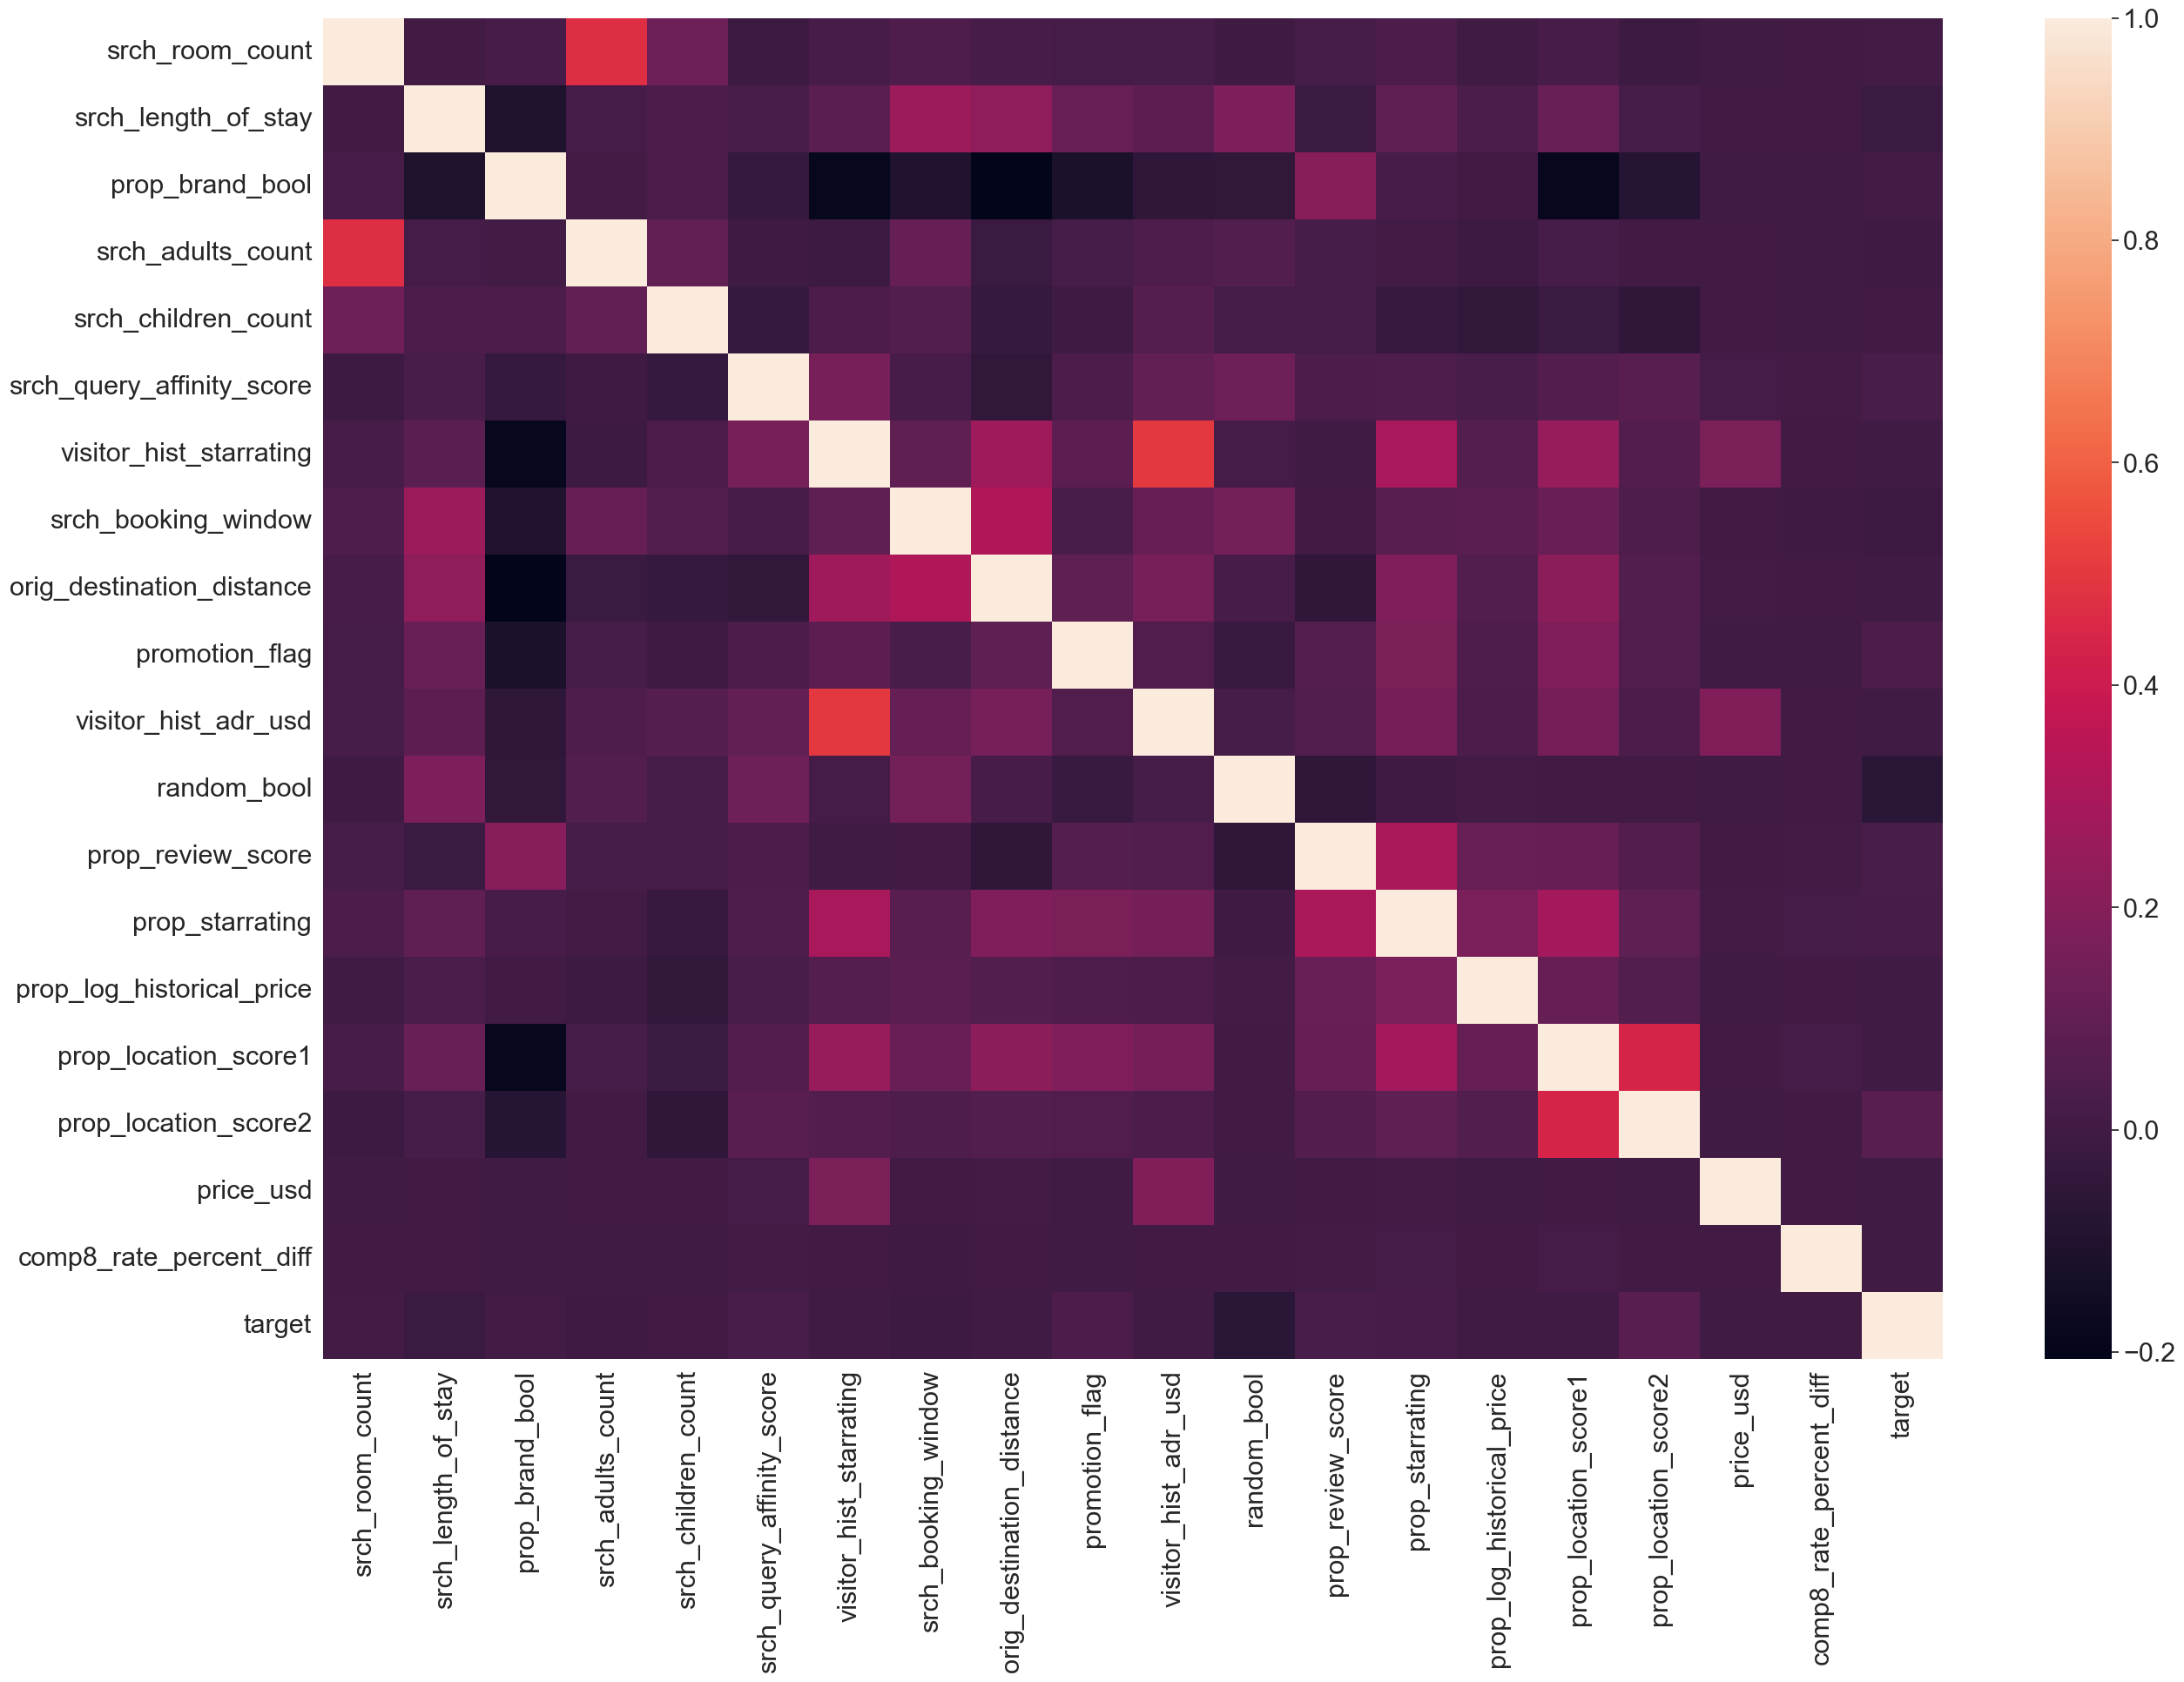

In [106]:
# heatmap of correlation matrix
sns.set(rc={'figure.figsize':(30, 20)})
sns.set(font_scale=2)
sns.heatmap(cor)

In [57]:
train['price_usd'].describe()

count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64

In [68]:
print(max(train['price_usd']))
print(train['price_usd'].nlargest(100))

19726328.0
1168566    19726328.00
680748     11818011.00
3117007     9381308.71
1168574     5444467.00
2945135     4973355.00
              ...     
1799737       65131.00
4786073       64967.77
4653530       64716.00
76811         64623.00
548443        64159.00
Name: price_usd, Length: 1000, dtype: float64


In [71]:
print('we kunnen op 599 afkappen op 99% quantile',train['price_usd'].quantile(0.99))

we kunnen op 599 afkappen op 99% quantile 599.0


1.972633e+07 is max value 'If an individual data instance can be considered as anomalous with respect to the rest of the data, we call it Point Anomalies (e.g. purchase with large transaction value).' dit stond hier https://www.kaggle.com/code/nikitsoftweb/production-time-series-of-price-anomaly-detection/notebook) 

bij ons zijn de waardes veel grot en echt hoog in de opdract staat dat mensen voor meerdere nachten boeken. als je kijkt naar country id van visitor is het bijna allemaal 202 en paar 53 dus misschien is dat een super duur land (idk of we hier achter kunnen komen). kijk beneden length of stay is niet echt lang dus lijkt wel een soort bug

In [62]:
train[train['price_usd'] > 5000].sort_values(by='price_usd', ascending=False).head(20)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,perceived_value
1168566,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,39677,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,12.000
680748,45559,2013-06-14 16:18:20,5,164,NaN,NaN,98,114295,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.000
3117007,209314,2013-06-02 13:45:33,15,53,NaN,NaN,53,130892,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,13.850
1168574,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,81654,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,19.305
2945135,197817,2013-02-10 23:17:29,5,202,NaN,NaN,219,17580,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,9.600
1168576,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,87788,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,18.270
1168562,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,7077,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,16.920
1168580,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,101697,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,18.180
4172824,279943,2013-04-12 16:55:12,5,202,NaN,NaN,202,54596,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,19.720
1168581,78107,2013-06-17 17:32:48,5,202,NaN,NaN,39,109731,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,19.450


In [72]:
top_prices = train.nlargest(30, 'price_usd')

# Show their srch_length_of_stay (and maybe a few other features)
train['price_usd_capped'] = np.minimum(train['price_usd'], 599)
print(top_prices[['price_usd', 'srch_length_of_stay', 'srch_room_count', 'visitor_location_country_id','prop_id']])

           price_usd  srch_length_of_stay  srch_room_count  \
1168566  19726328.00                    4                1   
680748   11818011.00                    3                1   
3117007   9381308.71                    1                1   
1168574   5444467.00                    4                1   
2945135   4973355.00                    4                1   
1168576   4884239.00                    4                1   
1168562   4339792.00                    4                1   
1168580   4260887.00                    4                1   
4172824   4216286.00                    2                1   
1168581   3905813.00                    4                1   
1168583   3905813.00                    4                1   
1168578   3779565.00                    4                1   
2945143   3748123.00                    4                1   
3116994   3682007.90                    1                1   
3117004   3272895.58                    1                1   
3117002 

In [66]:
train.loc[(train['price_usd'] == 19726328.0) & (train['visitor_location_country_id'] == 202)]
train['visitor_location_country_id'].value_counts().head(10)

visitor_location_country_id
219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
Name: count, dtype: int64

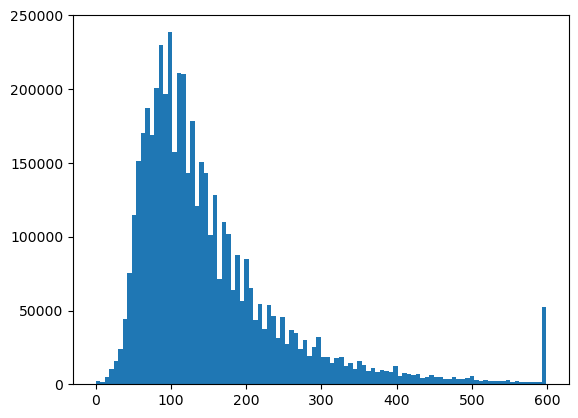

In [74]:
prices = train['price_usd_capped']
plt.hist(prices,bins = 100)
plt.show()

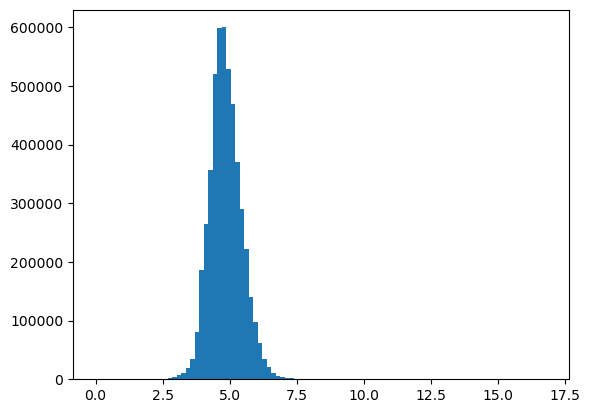

In [17]:
plt.hist(np.log1p(prices),bins = 100)
plt.show()

Applying log1p() (log(x + 1)) compresses large values and spreads out small ones, resulting in something closer to a normal distribution.

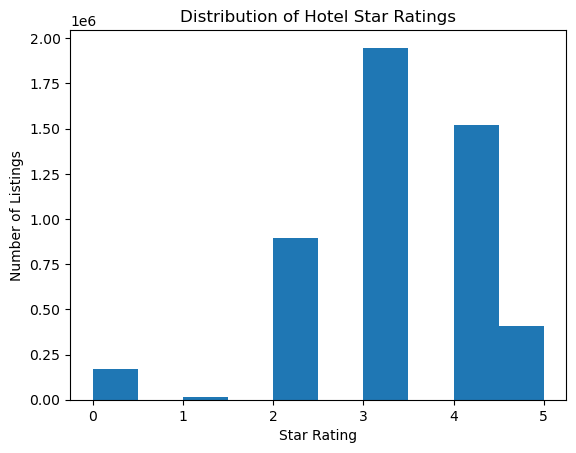

In [23]:
rating = train['prop_starrating']
plt.hist(rating)
plt.title('Hotel Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Listings')
plt.show()

misschien interessante attribute, ondekken hoe rating correlates with clicks 


Text(0.5, 1.0, 'Location Score 1 Distribution')

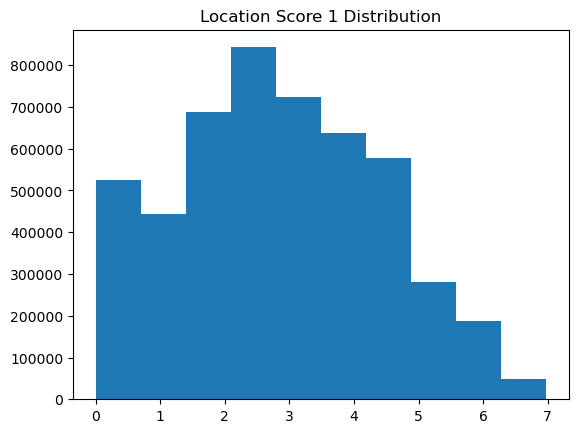

In [27]:
location = train['prop_location_score1']
plt.hist(location)
plt.title('Location Score 1 Distribution')

Text(0.5, 1.0, 'Location Score 1: Clicked vs Booked')

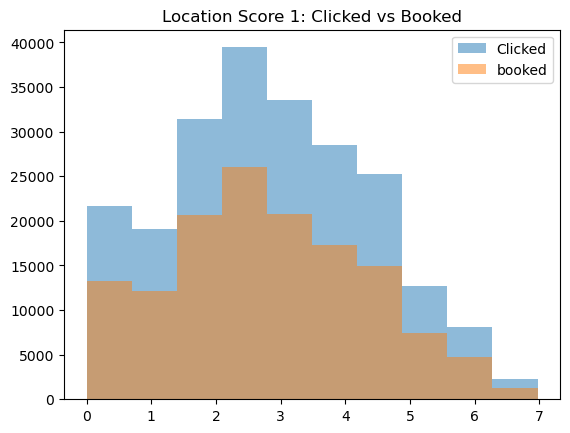

In [39]:
clicked_probscore = train[train['click_bool'] == 1]['prop_location_score1']

booked_probscore = train[train['booking_bool'] == 1]['prop_location_score1']

plt.hist(clicked_probscore,alpha=0.5, label='Clicked')
plt.hist(booked_probscore,alpha=0.5, label='booked')
plt.legend()
plt.title('Location Score 1: Clicked vs Booked')

plot hierboven is de locatie score die die kreeg wanneer die geboekt en geklikt is. wat ik hier uit haal is dat mensen niet per se door locatie meer boeken dan klikken. dus de locatie is wel geod voor clicks maar niet per se bepalende factor voor boeken maar location score wel goede feature.

Text(0.5, 1.0, 'Search Length of Stay Distribution')

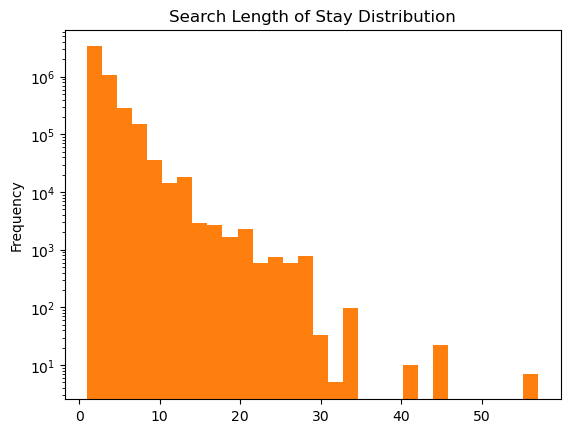

In [93]:
train['srch_length_of_stay'].plot(kind='hist', bins=30)
length_stay = train['srch_length_of_stay']
plt.hist(length_stay, bins=30,log = True) # log is true kan je gebruiken 
plt.title('Search Length of Stay Distribution')

Text(0.5, 1.0, 'Time Series of room price by date time of search')

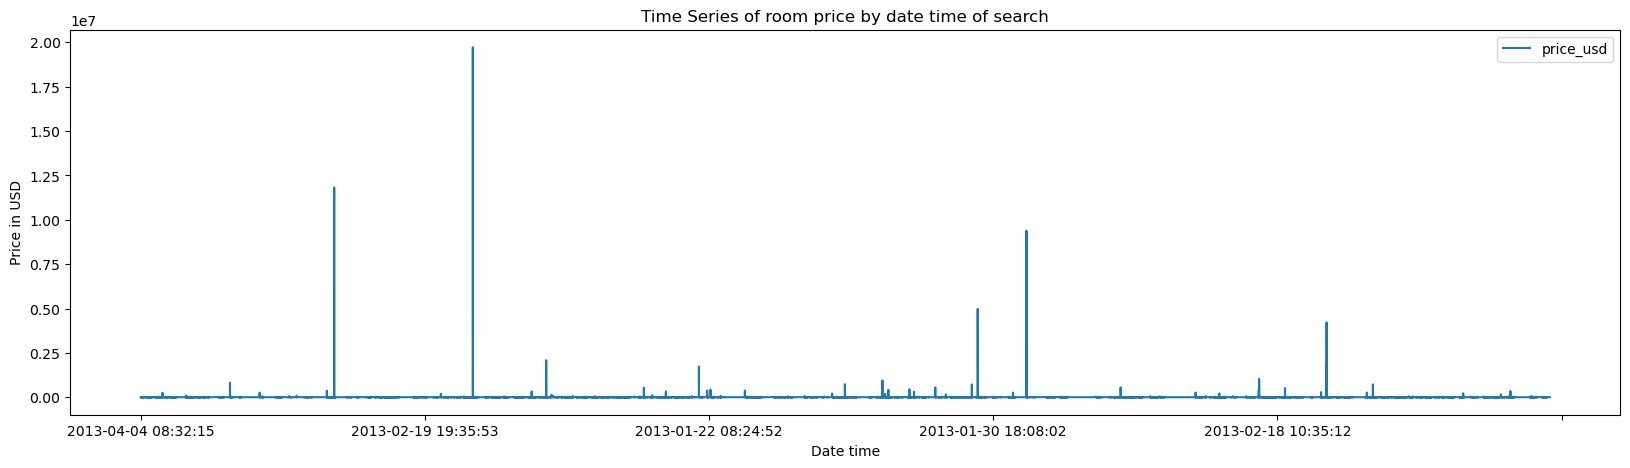

In [76]:
train.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

Text(0.5, 0, 'Difference')

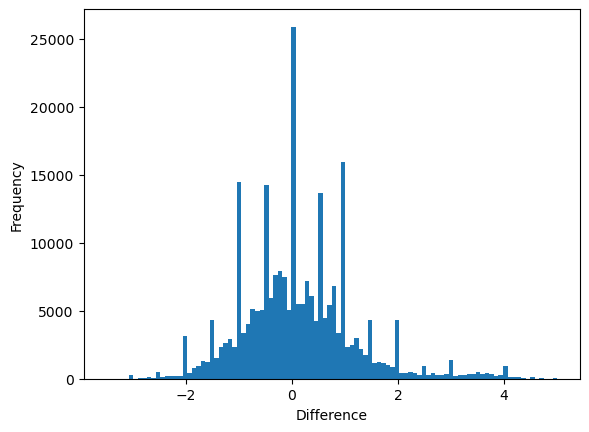

In [97]:
df_sub = train[['visitor_hist_starrating', 'prop_starrating']]
df_sub = df_sub[df_sub.isnull().sum(axis=1) == 0]
diff_rating = df_sub['visitor_hist_starrating'] - df_sub['prop_starrating']
diff_rating.plot(kind='hist', bins=100)
plt.xlabel('Difference')

 Plot above Captures User Preference vs. Offered Option
visitor_hist_starrating = average star rating of hotels the user has previously booked
prop_starrating = the star rating of the currently viewed hotel
Their difference reflects how well the current offer aligns with the user's past preferences. we see difference peak at 0 so users tend to click/book hotels similar to their history this can be a useful feature 